<a href="https://colab.research.google.com/github/msolorzan/TensorFlow-projects/blob/main/03_Computer_vision_%26_convolutional_neural_networks_in_TensorFlow_Extra_curriculum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Duck and hen (Actually cocks and chickens too) classification

In [ ]:
# Import the libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get the data

I took some images (My mom has a little ranch) and another were downloaded on internet so I've had got to clean it, even some images were took by friends.

I uploaded this pictures to Google Drive.

# Inspect the data

In [ ]:
!ls /content/drive/MyDrive/Data_science/TensorFlow/patos_gallinas

test  train


In [ ]:
!ls /content/drive/MyDrive/Data_science/TensorFlow/patos_gallinas/train

gallina  pato


In [ ]:
directory = '/content/drive/MyDrive/Data_science/TensorFlow/patos_gallinas'

In [ ]:
import os 

for dirpath, dirnames, filenames in os.walk(directory):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in /content/drive/MyDrive/Data_science/TensorFlow/patos_gallinas
There are 2 directories and 0 images in /content/drive/MyDrive/Data_science/TensorFlow/patos_gallinas/train
There are 0 directories and 397 images in /content/drive/MyDrive/Data_science/TensorFlow/patos_gallinas/train/gallina
There are 0 directories and 381 images in /content/drive/MyDrive/Data_science/TensorFlow/patos_gallinas/train/pato
There are 2 directories and 0 images in /content/drive/MyDrive/Data_science/TensorFlow/patos_gallinas/test
There are 0 directories and 163 images in /content/drive/MyDrive/Data_science/TensorFlow/patos_gallinas/test/pato
There are 0 directories and 170 images in /content/drive/MyDrive/Data_science/TensorFlow/patos_gallinas/test/gallina


In [ ]:
import pathlib

data_dir = pathlib.Path(directory + '/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Created a list of class_names from the subdirectories

print(class_names) # Gallinas = hens, Patos = ducks

['gallina' 'pato']


In [ ]:
# Vizualise random images
import matplotlib as mpl
import random

def plot_random_image(target_dir: str, target_class: str):
  '''
  Return an image from the target class in a directory
  '''
  target_folder = target_dir + '/train/' + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read the image and plot 
  img = mpl.image.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(f'{target_class}   |  Size:  {img.shape}')
  plt.axis('Off')

  return img

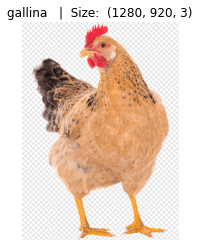

In [ ]:
img_hen = plot_random_image(directory, 'gallina')

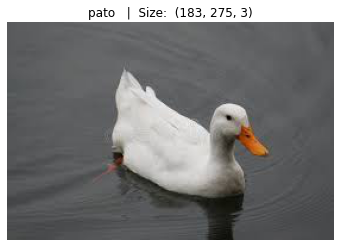

In [ ]:
img_duck = plot_random_image(directory, 'pato')

In [ ]:
# Create a data train and test of each dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.) # 255 is the max value in a image, so we have to normalize the values
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
train_dir = '/content/drive/MyDrive/Data_science/TensorFlow/patos_gallinas/train'
test_dir = '/content/drive/MyDrive/Data_science/TensorFlow/patos_gallinas/test'

In [ ]:
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (256, 256),
                                               batch_size = 32,
                                               class_mode = 'binary',
                                               shuffle = True) # Binary because of there are only two outputs
test_data = train_datagen.flow_from_directory(directory = test_dir,
                                               target_size = (256, 256),
                                               batch_size = 32,
                                               class_mode = 'binary',
                                               shuffle = True)


Found 778 images belonging to 2 classes.
Found 333 images belonging to 2 classes.


In [ ]:
# How many batches are in train_data?
len(train_data)

25

In [ ]:
778/32 # Because of the size of batches is 32

24.3125

In [ ]:
# The images we've imported is too large, as it can see in the plot above
import tensorflow as tf

tf.Variable(img_duck)

<tf.Variable 'Variable:0' shape=(183, 275, 3) dtype=uint8, numpy=
array([[[89, 90, 92],
        [89, 90, 92],
        [89, 90, 92],
        ...,
        [85, 86, 88],
        [85, 86, 88],
        [85, 86, 88]],

       [[89, 90, 92],
        [89, 90, 92],
        [89, 90, 92],
        ...,
        [85, 86, 88],
        [85, 86, 88],
        [85, 86, 88]],

       [[89, 90, 92],
        [89, 90, 92],
        [89, 90, 92],
        ...,
        [85, 86, 88],
        [85, 86, 88],
        [85, 86, 88]],

       ...,

       [[75, 77, 76],
        [75, 77, 76],
        [75, 77, 76],
        ...,
        [72, 72, 74],
        [72, 72, 74],
        [72, 72, 74]],

       [[75, 77, 76],
        [75, 77, 76],
        [75, 77, 76],
        ...,
        [72, 72, 74],
        [72, 72, 74],
        [72, 72, 74]],

       [[74, 76, 75],
        [74, 76, 75],
        [74, 76, 75],
        ...,
        [72, 72, 74],
        [72, 72, 74],
        [72, 72, 74]]], dtype=uint8)>

In [ ]:
# Create a base model, a baseline model a improve it
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPool2D, Conv2D, Activation
from tensorflow.keras.optimizers import Adam

model_1 = Sequential([
    Conv2D(filters = 10,
           kernel_size = (3, 3),
           strides = (1, 1),
           padding = 'valid',
           activation = 'relu',
           input_shape = (256, 256, 3) 
           ),
    Conv2D(10, 3, activation = 'relu'),          
    Conv2D(10, 3, activation = 'relu'),
    Flatten(),
    Dense(1, activation = 'sigmoid') # Sigmoid due of binary classification, if classification was more than 2 outputs the activation would bee softmax
])

In [ ]:
# Compile the model
model_1.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

In [ ]:
# Get the summary of the model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 250, 250, 10)      910       
                                                                 
 flatten (Flatten)           (None, 625000)            0         
                                                                 
 dense (Dense)               (None, 1)                 625001    
                                                                 
Total params: 627,101
Trainable params: 627,101
Non-trainable params: 0
_________________________________________________________________


# Fit the model

In [ ]:
# Check the lengths of the train and test data generators
len(train_data), len(test_data)

(25, 11)

In [ ]:
# Fit the model
history_1 = model_1.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
 3/25 [==>...........................] - ETA: 1:41 - loss: 2.8007 - accuracy: 0.4792

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


25/25 [==============================] - 244s 10s/step - loss: 0.9315 - accuracy: 0.6080 - val_loss: 0.5842 - val_accuracy: 0.6667
Epoch 2/5
25/25 [==============================] - 65s 3s/step - loss: 0.4199 - accuracy: 0.8201 - val_loss: 0.5229 - val_accuracy: 0.7508
Epoch 3/5
25/25 [==============================] - 64s 3s/step - loss: 0.2314 - accuracy: 0.9254 - val_loss: 0.5176 - val_accuracy: 0.7447
Epoch 4/5
25/25 [==============================] - 65s 3s/step - loss: 0.1208 - accuracy: 0.9627 - val_loss: 0.4881 - val_accuracy: 0.7568
Epoch 5/5
25/25 [==============================] - 65s 3s/step - loss: 0.0538 - accuracy: 0.9884 - val_loss: 0.9165 - val_accuracy: 0.6997


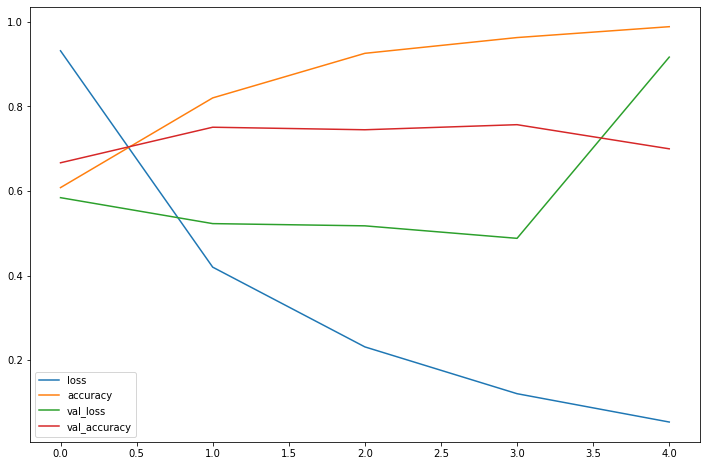

In [ ]:
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize = (12, 8))

In [ ]:
def plot_accuracy_loss_curves(history):

  '''
  Return two fig plots. Plots accuracy and loss 
  '''

  loss = history.history['loss'] 
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy'] 
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot losses
  plt.plot(epochs, loss, label = 'loss')
  plt.plot(epochs, val_loss, label = 'val_loss')
  plt.title('Losses')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuraciees
  plt.figure()
  plt.plot(epochs, accuracy, label = 'accuracy')
  plt.plot(epochs, val_accuracy, label = 'val_accuracy')
  plt.title('Accuracies')
  plt.xlabel('Epochs')
  plt.legend()

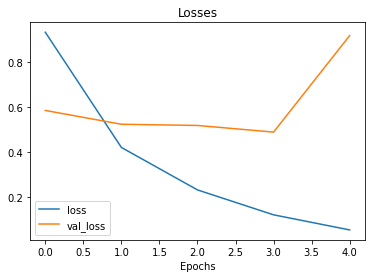

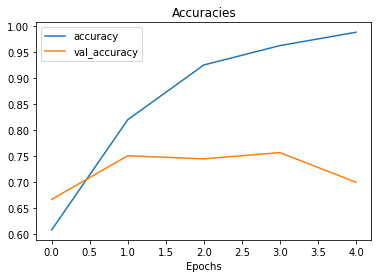

In [ ]:
plot_accuracy_loss_curves(history_1)

It looks like the predictions of test dataset grow up the loss, so maybe indicates overfitting problems.

Improve the model, adding more complex convolutional layers is an option

# More complex model parameters

In [ ]:
# Imrpove the model

model_2 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (256, 256, 3)),
    MaxPool2D(pool_size = (2, 2)), # Of course, some hyperparemeters values are by default

    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),

    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

In [ ]:
# Compile the model
model_2.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data,
                      epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data = test_data,
                      validation_steps = len(test_data)
                      )

Epoch 1/5
10/25 [===========>..................] - ETA: 15s - loss: 0.6904 - accuracy: 0.5344

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


25/25 [==============================] - 37s 1s/step - loss: 0.6804 - accuracy: 0.5566 - val_loss: 0.6340 - val_accuracy: 0.6126
Epoch 2/5
25/25 [==============================] - 35s 1s/step - loss: 0.6294 - accuracy: 0.6710 - val_loss: 0.6146 - val_accuracy: 0.6577
Epoch 3/5
25/25 [==============================] - 36s 1s/step - loss: 0.5511 - accuracy: 0.7069 - val_loss: 0.5306 - val_accuracy: 0.7267
Epoch 4/5
25/25 [==============================] - 35s 1s/step - loss: 0.4890 - accuracy: 0.7532 - val_loss: 0.5008 - val_accuracy: 0.7658
Epoch 5/5
25/25 [==============================] - 35s 1s/step - loss: 0.4293 - accuracy: 0.8085 - val_loss: 0.5081 - val_accuracy: 0.7417


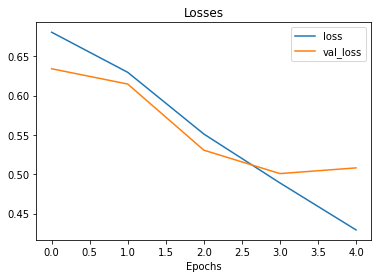

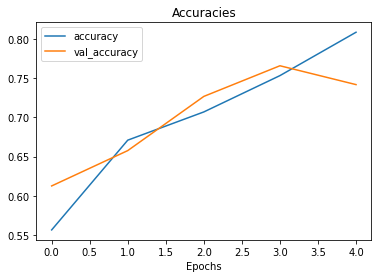

In [ ]:
plot_accuracy_loss_curves(history_2)

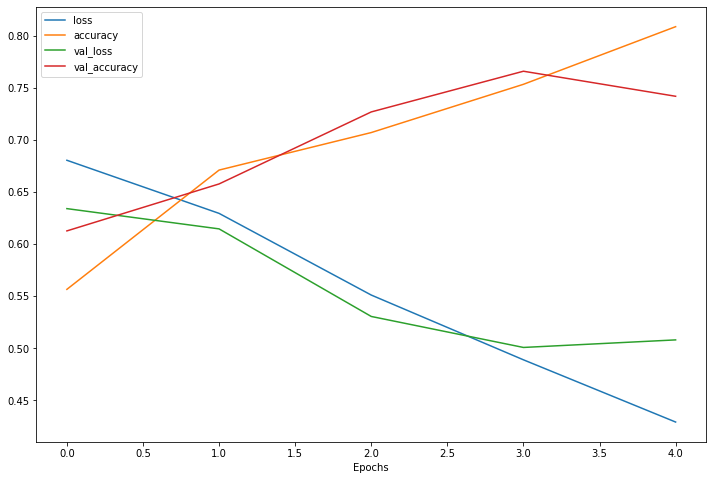

In [ ]:
pd.DataFrame(history_2.history).plot(figsize = (12, 8), xlabel = 'Epochs')

Let's try improve the model with augmentation data...

# Augmentation data

In [ ]:
train_data_augmented = ImageDataGenerator(rescale = 1/255.,
                                          rotation_range = 0.15,
                                          width_shift_range = 0.15,
                                          height_shift_range = 0.15,
                                          shear_range = 0.1,
                                          zoom_range = 0.15,
                                          horizontal_flip = True)

In [ ]:
train_data_augmented = train_data_augmented.flow_from_directory(train_dir,
                                                                class_mode = 'binary',
                                                                shuffle = False) # Shuffle it improve the performance

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               class_mode = 'binary',
                                               shuffle = False) # Binary because of there are only two outputs
test_data = train_datagen.flow_from_directory(directory = test_dir,
                                               class_mode = 'binary',
                                               shuffle = False)

Found 778 images belonging to 2 classes.
Found 778 images belonging to 2 classes.
Found 333 images belonging to 2 classes.


In [ ]:
from numpy.random import randint

def compare_augmented_and_non(train, train_augmented):
  '''
  Shows the original and the augmented image
  '''

  images, labels = train.next()
  images_augmented, labels_augmented = train_augmented.next()

  random_image = randint(len(train.next()[1]))

  # Plot the original image
  plt.imshow(images[random_image])
  plt.axis(False)
  plt.title(f'Original image | Size: {images[random_image].shape}')

  # Plot the augmented image
  plt.figure()
  plt.imshow(images_augmented[random_image])
  plt.axis(False)
  plt.title(f'Augmented image | Size: {images_augmented[random_image].shape}')

  return random_image

0

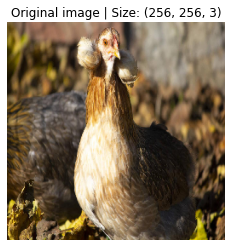

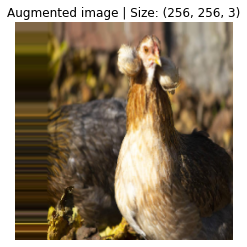

In [ ]:
compare_augmented_and_non(train_data, train_data_augmented)

In [ ]:
# Now, set the augmentation data with shuffled images, this change of the dataset should improve the performance

train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.15,
                                             width_shift_range = 0.15,
                                             height_shift_range = 0.15,
                                             shear_range = 0.1,
                                             zoom_range = 0.3,
                                             horizontal_flip = True)


train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                         class_mode = 'binary',
                                                                         shuffle = True)

Found 778 images belonging to 2 classes.


In [ ]:
# Create a new model, but now with data augmented, data shuffled and the model more complex

model_3 = Sequential([
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')    
])

# Compile the model
model_3.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = [['accuracy']]
)

# Fit the model
history_3 = model_3.fit(train_data_augmented_shuffled,
                      epochs = 5,
                      steps_per_epoch = len(train_data_augmented_shuffled),
                      validation_data = test_data,
                      validation_steps = len(test_data)
                      )

Epoch 1/5
23/25 [==========================>...] - ETA: 2s - loss: 0.7130 - accuracy: 0.5322

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


25/25 [==============================] - 43s 2s/step - loss: 0.7106 - accuracy: 0.5334 - val_loss: 0.7055 - val_accuracy: 0.5105
Epoch 2/5
25/25 [==============================] - 43s 2s/step - loss: 0.6813 - accuracy: 0.5746 - val_loss: 0.6720 - val_accuracy: 0.5586
Epoch 3/5
25/25 [==============================] - 41s 2s/step - loss: 0.6544 - accuracy: 0.6170 - val_loss: 0.6447 - val_accuracy: 0.5946
Epoch 4/5
25/25 [==============================] - 42s 2s/step - loss: 0.6792 - accuracy: 0.5784 - val_loss: 0.6449 - val_accuracy: 0.6096
Epoch 5/5
25/25 [==============================] - 42s 2s/step - loss: 0.6188 - accuracy: 0.6671 - val_loss: 0.5579 - val_accuracy: 0.7177


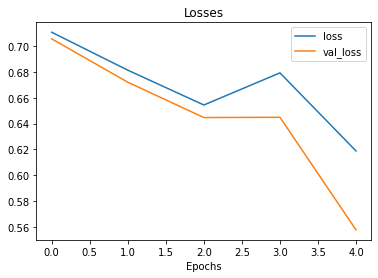

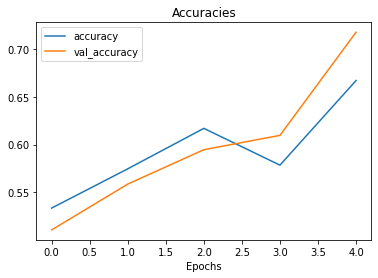

In [ ]:
plot_accuracy_loss_curves(history_3)

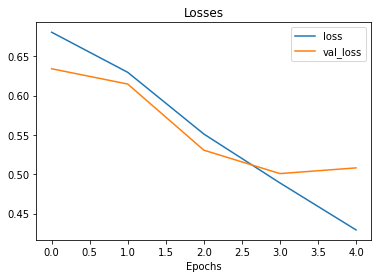

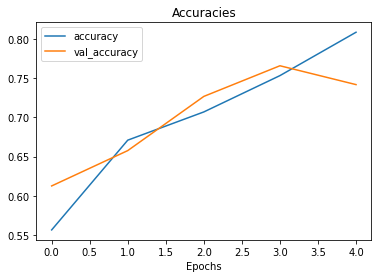

In [ ]:
plot_accuracy_loss_curves(history_2)

 Another change is find a better learning rate

# Learning rate scheduler

In [ ]:
# Create a learning rate callback
from tensorflow.keras.callbacks import LearningRateScheduler
learning_rate_scheduler = LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch)) # Since epochs amount are not large, I0ve tried to estimate a learning rate scheduler that grows fast

In [ ]:
# Create a new model
model_4 = Sequential([
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

# Compile the model
model_4.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

# Fit the model
history_4 = model_4.fit(train_data_augmented_shuffled,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data),
                        callbacks = learning_rate_scheduler
                        )

Epoch 1/5
24/25 [===========================>..] - ETA: 1s - loss: 0.6852 - accuracy: 0.5483

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


25/25 [==============================] - 44s 2s/step - loss: 0.6843 - accuracy: 0.5553 - val_loss: 0.6714 - val_accuracy: 0.5405 - lr: 1.0000e-04
Epoch 2/5
25/25 [==============================] - 42s 2s/step - loss: 0.6048 - accuracy: 0.6388 - val_loss: 0.5802 - val_accuracy: 0.6547 - lr: 0.0010
Epoch 3/5
25/25 [==============================] - 41s 2s/step - loss: 0.6011 - accuracy: 0.7108 - val_loss: 0.4930 - val_accuracy: 0.8018 - lr: 0.0100
Epoch 4/5
25/25 [==============================] - 41s 2s/step - loss: 1.0868 - accuracy: 0.5154 - val_loss: 0.6932 - val_accuracy: 0.5105 - lr: 0.1000
Epoch 5/5
25/25 [==============================] - 42s 2s/step - loss: 0.7036 - accuracy: 0.4949 - val_loss: 0.7248 - val_accuracy: 0.5105 - lr: 1.0000


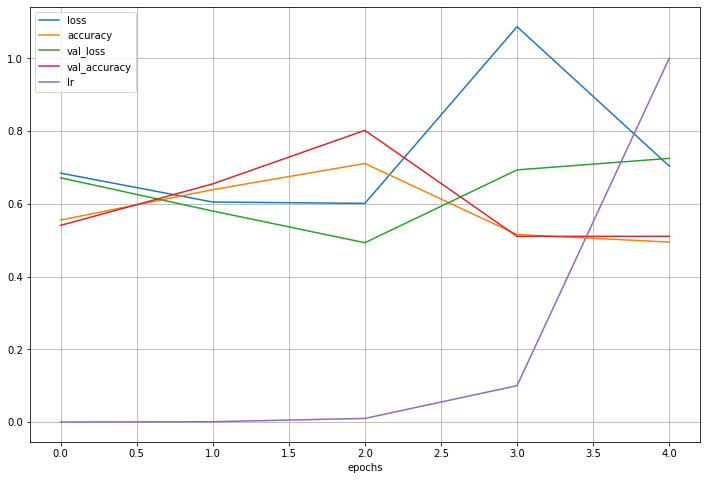

In [ ]:
pd.DataFrame(history_4.history).plot(figsize = (12, 8), xlabel = 'epochs', grid = True)

In [ ]:
def best_lr(history):
  lrs = 1e-4 * 10 ** (np.arange(1, 6, 1))
  plt.semilogx(lrs, history.history['loss'])
  plt.xlabel('Learning Rate')
  plt.ylabel('Loss')
  plt.grid(True)
  plt.title('Learning Rate vs. Loss')

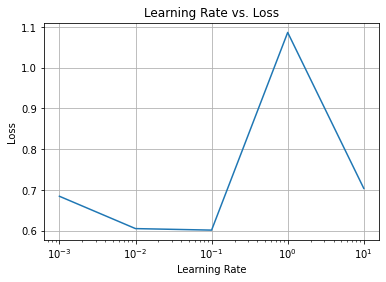

In [ ]:
best_lr(history_4) # It looks like the learning rate on 1e-2 reduce the loss

In [ ]:
# Create a model, but now with a better learning rate
model_5 = Sequential([
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

lr = 0.1

# Compile the model
model_5.compile(loss = 'binary_crossentropy',
                optimizer = Adam(learning_rate = lr),
                metrics = ['accuracy'])

# Fit the model
history_5 = model_5.fit(train_data_augmented_shuffled,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
25/25 [==============================] - 43s 2s/step - loss: 38.1655 - accuracy: 0.4871 - val_loss: 0.6966 - val_accuracy: 0.4895
Epoch 2/5
25/25 [==============================] - 41s 2s/step - loss: 0.6926 - accuracy: 0.5103 - val_loss: 0.6938 - val_accuracy: 0.5105
Epoch 3/5
25/25 [==============================] - 43s 2s/step - loss: 0.6944 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.4895
Epoch 4/5
25/25 [==============================] - 42s 2s/step - loss: 0.6944 - accuracy: 0.4871 - val_loss: 0.6931 - val_accuracy: 0.5105
Epoch 5/5
25/25 [==============================] - 42s 2s/step - loss: 0.6939 - accuracy: 0.4589 - val_loss: 0.6930 - val_accuracy: 0.5105


In [ ]:
model_1.evaluate(test_data)

 3/11 [=======>......................] - ETA: 6s - loss: 0.1470 - accuracy: 0.9479

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


11/11 [==============================] - 14s 1s/step - loss: 0.9165 - accuracy: 0.6997


[0.9165131449699402, 0.6996996998786926]

In [ ]:
model_2.evaluate(test_data)

 4/11 [=========>....................] - ETA: 3s - loss: 0.4255 - accuracy: 0.7969

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


11/11 [==============================] - 12s 1s/step - loss: 0.5081 - accuracy: 0.7417


[0.5080762505531311, 0.7417417168617249]

In [ ]:
model_3.evaluate(test_data)

 4/11 [=========>....................] - ETA: 3s - loss: 0.6354 - accuracy: 0.6094

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


11/11 [==============================] - 11s 978ms/step - loss: 0.5579 - accuracy: 0.7177


[0.5578725934028625, 0.717717707157135]

In [ ]:
model_4.evaluate(test_data)

11/11 [==============================] - 11s 977ms/step - loss: 0.7248 - accuracy: 0.5105


[0.7248485088348389, 0.5105105042457581]

In [ ]:
model_5.evaluate(test_data)

11/11 [==============================] - 11s 963ms/step - loss: 0.6930 - accuracy: 0.5105


[0.6929532885551453, 0.5105105042457581]

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 10)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 10)      

In [ ]:
# Save the model
model_2.save('/content/drive/MyDrive/Data_science/saved_trained_hen_duck_model_2')
model_5.save('/content/drive/MyDrive/Data_science/saved_trained_hen_duck_model_5')